In [1]:
import pymongo
import datetime
import matplotlib

import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt

from collections import OrderedDict

params = {'text.usetex' : True,
          'font.size' : 14,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)

MONGO_HOST = "localhost"
MONGO_PORT = 27017

mongo_connection = pymongo.MongoClient("mongodb://"+MONGO_HOST+":"+str(MONGO_PORT), maxPoolSize=None)

### Optimism

In [2]:
timestamp_differences_pre_bedrock = list()
timestamp_differences_pre_bedrock_dictionary = dict()
timestamp_differences_pre_bedrock_over_time = dict()
timestamp_differences_post_bedrock = list()
timestamp_differences_post_bedrock_dictionary = dict()
timestamp_differences_post_bedrock_over_time = dict()
cursor = mongo_connection["optimism"]["l2_messages_results"].find()
c = 0
pre_bedrock_outliers = list()
post_bedrock_outliers = list()
for d in cursor:
    delta = d["l2_timestamp"] - d["l1_timestamp"]
    if d["l2_block_number"] < 105235063:
        timestamp_differences_pre_bedrock.append(delta)
        if not delta in timestamp_differences_pre_bedrock_dictionary:
            timestamp_differences_pre_bedrock_dictionary[delta] = 0
        timestamp_differences_pre_bedrock_dictionary[delta] += 1
        if delta <= 2000:
            timestamp_differences_pre_bedrock_over_time[datetime.datetime.fromtimestamp(d["l1_timestamp"])] = delta
        else:
            pre_bedrock_outliers.append(delta)
    else:
        timestamp_differences_post_bedrock.append(delta)
        if not delta in timestamp_differences_post_bedrock_dictionary:
            timestamp_differences_post_bedrock_dictionary[delta] = 0
        timestamp_differences_post_bedrock_dictionary[delta] += 1
        if delta <= 2000:
            timestamp_differences_post_bedrock_over_time[datetime.datetime.fromtimestamp(d["l1_timestamp"])] = delta
        else:
            post_bedrock_outliers.append(delta)
    c += 1
print("Number of L2 swaps: "+str(c))
print()
print("Pre-Bedrock:")
print("Timestamp differences above 2000: "+str(len(pre_bedrock_outliers)))
print("Max timestamp difference: "+str(np.max(timestamp_differences_pre_bedrock))+" second(s).")
print("Mean timestamp difference: "+str(np.mean(timestamp_differences_pre_bedrock))+" second(s).")
print("Median timestamp difference: "+str(np.median(timestamp_differences_pre_bedrock))+" second(s).")
print("Min timestamp difference: "+str(np.min(timestamp_differences_pre_bedrock))+" second(s).")
print("Timestamp differences of 0 seconds: "+str(timestamp_differences_pre_bedrock.count(0)))
optimism_relayed_message_timestamp_differences_pre_bedrock_over_time = OrderedDict(sorted(timestamp_differences_pre_bedrock_over_time.items()))
print()
print("Post-Bedrock:")
print("Timestamp differences above 2000: "+str(len(post_bedrock_outliers)))
print("Max timestamp difference: "+str(np.max(timestamp_differences_post_bedrock))+" second(s).")
print("Mean timestamp difference: "+str(np.mean(timestamp_differences_post_bedrock))+" second(s).")
print("Median timestamp difference: "+str(np.median(timestamp_differences_post_bedrock))+" second(s).")
print("Min timestamp difference: "+str(np.min(timestamp_differences_post_bedrock))+" second(s).")
print("Timestamp differences of 0 seconds: "+str(timestamp_differences_post_bedrock.count(0)))
optimism_relayed_message_timestamp_differences_post_bedrock_over_time = OrderedDict(sorted(timestamp_differences_post_bedrock_over_time.items()))

Number of L2 swaps: 82753

Pre-Bedrock:
Timestamp differences above 2000: 0
Max timestamp difference: 1266 second(s).
Mean timestamp difference: 582.9231579224471 second(s).
Median timestamp difference: 609.0 second(s).
Min timestamp difference: 0 second(s).
Timestamp differences of 0 seconds: 7339

Post-Bedrock:
Timestamp differences above 2000: 9
Max timestamp difference: 22296 second(s).
Mean timestamp difference: 82.43428234252839 second(s).
Median timestamp difference: 74.0 second(s).
Min timestamp difference: 0 second(s).
Timestamp differences of 0 seconds: 4


### Arbitrum

In [3]:
timestamp_differences = list()
timestamp_differences_dictionary = dict()
timestamp_differences_over_time = dict()
cursor = mongo_connection["arbitrum"]["l2_messages_results"].find()
c = 0
outliers = list()
for d in cursor:
    delta = d["redeem_scheduled"]["submit_retryable_tx_timestamp"] - d["l1_timestamp"]
    timestamp_differences.append(delta)
    if not delta in timestamp_differences_dictionary:
        timestamp_differences_dictionary[delta] = 0
    timestamp_differences_dictionary[delta] += 1
    if delta <= 2000:
        timestamp_differences_over_time[datetime.datetime.fromtimestamp(d["l1_timestamp"])] = delta
    else:
        outliers.append(delta)
    c += 1
print("Number of L2 swaps: "+str(c))
print()
print("Timestamp differences submit retryable tx above 2000: "+str(len(outliers)))
print("Max submit retryable tx timestamp difference: "+str(np.max(timestamp_differences))+" second(s).")
print("Mean submit retryable tx timestamp difference: "+str(np.mean(timestamp_differences))+" second(s).")
print("Median submit retryable tx timestamp difference: "+str(np.median(timestamp_differences))+" second(s).")
print("Min submit retryable tx timestamp difference: "+str(np.min(timestamp_differences))+" second(s).")
print("Timestamp differences of 0 seconds: "+str(timestamp_differences.count(0)))
arbitrum_ticket_created_timestamp_differences_over_time = OrderedDict(sorted(timestamp_differences_over_time.items()))
print()

Number of L2 swaps: 87921

Timestamp differences submit retryable tx above 2000: 3
Max submit retryable tx timestamp difference: 3694 second(s).
Mean submit retryable tx timestamp difference: 797.8951672524198 second(s).
Median submit retryable tx timestamp difference: 868.0 second(s).
Min submit retryable tx timestamp difference: 0 second(s).
Timestamp differences of 0 seconds: 4



In [4]:
timestamp_differences = list()
timestamp_differences_dictionary = dict()
timestamp_differences_over_time = dict()
cursor = mongo_connection["arbitrum"]["l2_messages_results"].find()
outliers = list()
for d in cursor:
    delta = d["redeem_scheduled"]["redeem_scheduled_tx_timestamp"] - d["l1_timestamp"]
    timestamp_differences.append(delta)
    if not delta in timestamp_differences_dictionary:
        timestamp_differences_dictionary[delta] = 0
    timestamp_differences_dictionary[delta] += 1
    if delta <= 2000:
        timestamp_differences_over_time[datetime.datetime.fromtimestamp(d["l1_timestamp"])] = delta
    else:
        outliers.append(delta)
print("Timestamp differences redeem scheduled tx above 2000: "+str(len(outliers)))
print("Max redeem scheduled tx timestamp difference: "+str(np.max(timestamp_differences))+" second(s).")
print("Mean redeem scheduled tx timestamp difference: "+str(np.mean(timestamp_differences))+" second(s).")
print("Median redeem scheduled tx timestamp difference: "+str(np.median(timestamp_differences))+" second(s).")
print("Min redeem scheduled tx timestamp difference: "+str(np.min(timestamp_differences))+" second(s).")
arbitrum_ticket_redemption_timestamp_differences_over_time = OrderedDict(sorted(timestamp_differences_over_time.items()))


Timestamp differences redeem scheduled tx above 2000: 579
Max redeem scheduled tx timestamp difference: 62828 second(s).
Mean redeem scheduled tx timestamp difference: 966.348847260609 second(s).
Median redeem scheduled tx timestamp difference: 966.0 second(s).
Min redeem scheduled tx timestamp difference: 392 second(s).


### Plots

/tmp/ipykernel_2193/2139087801.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Jan\n2021', '', '', 'Jul', '', '', 'Jan\n2022', '', '', 'Jul', ''])


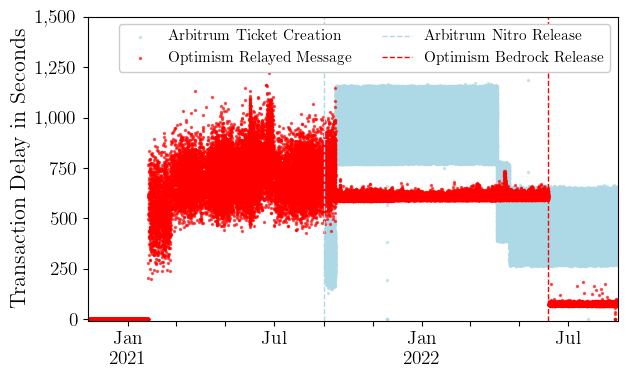

In [5]:
plt.figure(figsize=(6.5,4))

plt.scatter(list(arbitrum_ticket_created_timestamp_differences_over_time.keys()), list(arbitrum_ticket_created_timestamp_differences_over_time.values()), s=2, c="LightBlue", alpha=0.6, label="Arbitrum Ticket Creation")
plt.scatter(list(optimism_relayed_message_timestamp_differences_pre_bedrock_over_time.keys()) + list(optimism_relayed_message_timestamp_differences_post_bedrock_over_time.keys()), list(optimism_relayed_message_timestamp_differences_pre_bedrock_over_time.values()) + list(optimism_relayed_message_timestamp_differences_post_bedrock_over_time.values()), s=2, c="red", alpha=0.6, label="Optimism Relayed Message")

plt.axvline(x=datetime.datetime.fromtimestamp(1661949142), color="LightBlue", label="Arbitrum Nitro Release", linestyle="dashed", linewidth=1)
plt.axvline(x=datetime.datetime.fromtimestamp(1686061703), color="red", label="Optimism Bedrock Release", linestyle="dashed", linewidth=1)

ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(['Jan\n2021', '', '', 'Jul', '', '', 'Jan\n2022', '', '', 'Jul', ''])
ax.set_ylim(-10, 1500)
ax.legend(prop={"size": 11}, ncol=2, facecolor='white', framealpha=1)
plt.ylabel("Transaction Delay in Seconds", fontsize=16)
plt.tight_layout()
plt.margins(x=0)
plt.savefig('figure_9.png', bbox_inches='tight', facecolor='white', transparent=True, dpi=1000)

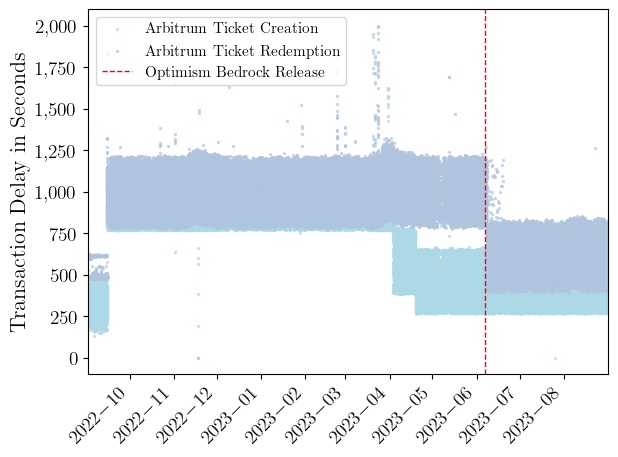

In [6]:
plt.scatter(list(arbitrum_ticket_created_timestamp_differences_over_time.keys()), list(arbitrum_ticket_created_timestamp_differences_over_time.values()), s=2, c="LightBlue", alpha=0.6, label="Arbitrum Ticket Creation")
plt.scatter(list(arbitrum_ticket_redemption_timestamp_differences_over_time.keys()), list(arbitrum_ticket_redemption_timestamp_differences_over_time.values()), s=2, c="lightsteelblue", alpha=0.6, label="Arbitrum Ticket Redemption")

plt.axvline(x=datetime.datetime.fromtimestamp(1686061703), color="red", label="Optimism Bedrock Release", linestyle="dashed", linewidth=1)

ax = plt.gca()
fmt = md.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
for label in ax.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax.legend(prop={"size": 11})
plt.ylabel("Transaction Delay in Seconds", fontsize=16)
plt.tight_layout()
plt.margins(x=0)
plt.show()